In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wnba = pd.read_csv('wnba.csv')
wnba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          143 non-null    object 
 1   Team          143 non-null    object 
 2   Pos           143 non-null    object 
 3   Height        143 non-null    int64  
 4   Weight        142 non-null    float64
 5   BMI           142 non-null    float64
 6   Birth_Place   143 non-null    object 
 7   Birthdate     143 non-null    object 
 8   Age           143 non-null    int64  
 9   College       143 non-null    object 
 10  Experience    143 non-null    object 
 11  Games Played  143 non-null    int64  
 12  MIN           143 non-null    int64  
 13  FGM           143 non-null    int64  
 14  FGA           143 non-null    int64  
 15  FG%           143 non-null    float64
 16  15:00         143 non-null    int64  
 17  3PA           143 non-null    int64  
 18  3P%           143 non-null    

In [3]:
wnba['Experience'].unique()

array(['2', '12', '4', '6', 'R', '8', '5', '3', '1', '9', '10', '11', '7',
       '13', '14', '15'], dtype=object)

In [4]:
wnba["Experience"] = wnba['Experience'].str.replace('R','0')

In [5]:
wnba['Experience'] = wnba['Experience'].astype(int)

In [6]:
def exp_cat(years):
    if years <= 0:
        return 'Rookies'
    elif years >=1 and years<3:
        return 'Little experience'
    elif years >=4 and years<5:
        return 'Experience'
    elif years >=5 and years <=10:
        return 'Very experienced'
    elif years>10:
        return 'Veterans'
wnba['Exp_ordinal'] = wnba['Experience'].apply(exp_cat)

In [8]:
wnba['Exp_ordinal'].unique()

array(['Little experience', 'Veterans', 'Experience', 'Very experienced',
       'Rookies', None], dtype=object)

In [11]:
freq = wnba['Exp_ordinal'].value_counts()
freq

Very experienced     51
Rookies              23
Little experience    23
Veterans             16
Experience           11
Name: Exp_ordinal, dtype: int64

<AxesSubplot:>

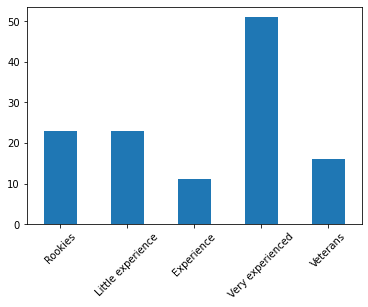

In [21]:
import random 
wnba['Exp_ordinal'].value_counts().iloc[[1,2,4,0,3]].plot.bar(rot=45)

<AxesSubplot:title={'center':'Number of players in WNBA by level of experience'}>

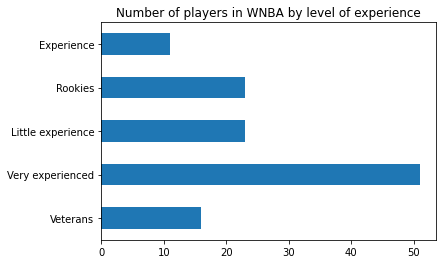

In [14]:
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.barh(title='Number of players in WNBA by level of experience')

<AxesSubplot:>

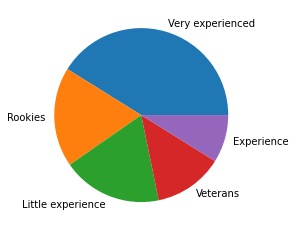

In [18]:
wnba['Exp_ordinal'].value_counts().plot.pie(label="")

Text(0, 0.5, '')

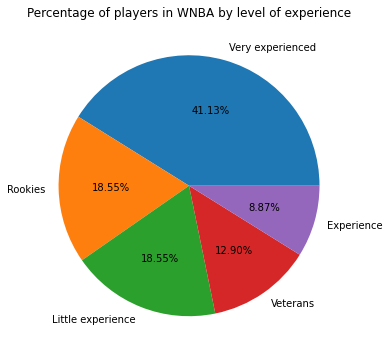

In [23]:
wnba['Exp_ordinal'].value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%',title='Percentage of players in WNBA by level of experience')
plt.ylabel('')

<AxesSubplot:ylabel='Frequency'>

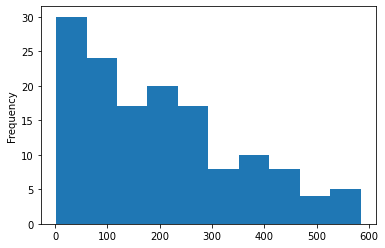

In [24]:
wnba['PTS'].plot.hist()

In [25]:
#predict how hist look like
wnba['Games Played'].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

<AxesSubplot:ylabel='Frequency'>

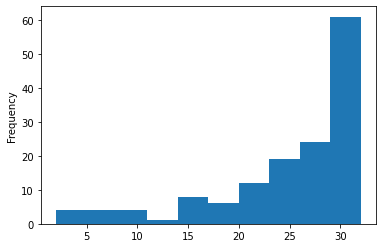

In [26]:
wnba['Games Played'].plot.hist()

Text(0.5, 0, 'Games played')

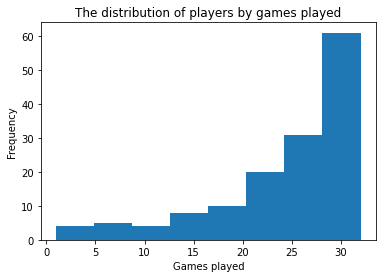

In [27]:
wnba['Games Played'].plot.hist(range=(1,32), bins=8, title="The distribution of players by games played")
plt.xlabel('Games played')

<AxesSubplot:ylabel='Frequency'>

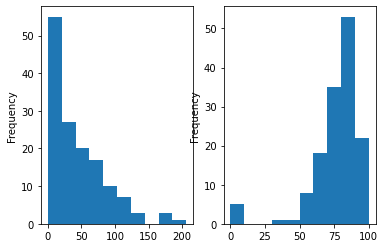

In [28]:
plt.subplot(1,2,1)
wnba['AST'].plot.hist() #tail towards right; right-skewed/positively skewed
plt.subplot(1,2,2)
wnba['FT%'].plot.hist() # left-skewed/negatively skewed

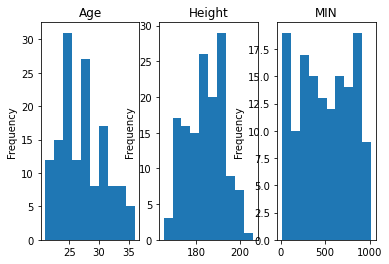

In [29]:
plt.subplot(1,3,1)
wnba['Age'].plot.hist(title='Age')
plt.subplot(1,3,2)
wnba['Height'].plot.hist(title='Height')
plt.subplot(1,3,3)
wnba['MIN'].plot.hist(title='MIN')

normal_distribution = 'Height'

# Dataquest - Comparing Frequency Distributions

<AxesSubplot:xlabel='Exp_ordinal', ylabel='count'>

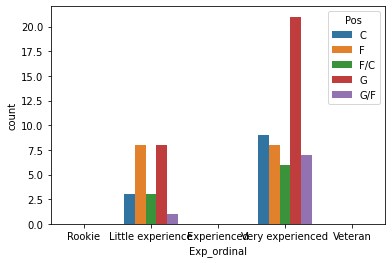

In [30]:
sns.countplot(x='Exp_ordinal', hue='Pos', data=wnba, order=['Rookie', 'Little experience', 'Experienced', 'Very experienced', 'Veteran'], hue_order= ['C', 'F','F/C', 'G', 'G/F'])

In [32]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x>=27 else 'young')

In [34]:
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else 'below average')

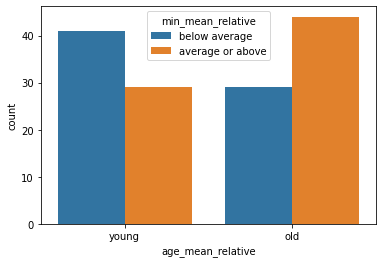

In [35]:
sns.countplot(x='age_mean_relative', hue='min_mean_relative', data=wnba)
freq = wnba['min_mean_relative'].value_counts()

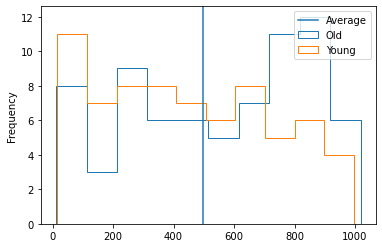

In [40]:
wnba[wnba.Age >=27]['MIN'].plot.hist(histtype='step', label='Old', legend=True)
wnba[wnba.Age <27]['MIN'].plot.hist(histtype='step', label='Young', legend=True)
plt.axvline(x=497, label='Average')
plt.legend()
plt.show()

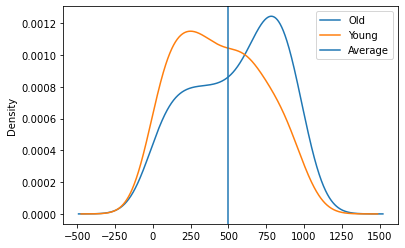

In [43]:
wnba[wnba['Age']>=27]['MIN'].plot.kde(label='Old', legend=True)
wnba[wnba.Age<27]['MIN'].plot.kde(label='Young', legend=True)
plt.axvline(x=497, label='Average')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Pos', ylabel='Weight'>

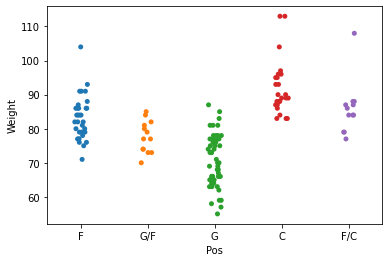

In [44]:
sns.stripplot(x='Pos', y='Weight', data=wnba)

<AxesSubplot:xlabel='Pos', ylabel='Height'>

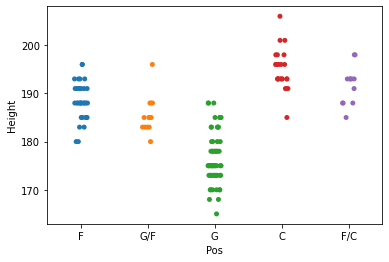

In [48]:
sns.stripplot(x='Pos', y='Height', data=wnba, jitter=True)

<AxesSubplot:xlabel='Pos', ylabel='Weight'>

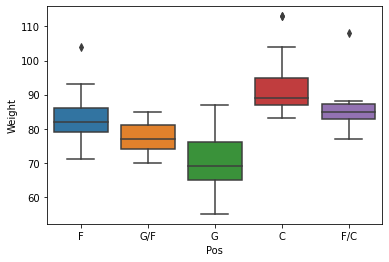

In [49]:
sns.boxplot(x='Pos', y='Weight', data=wnba)

C:\Users\leo_w\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


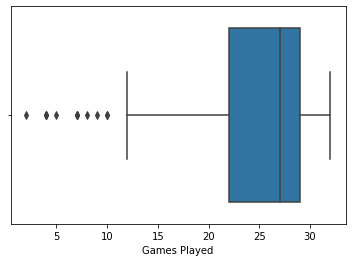

In [50]:
percentile = wnba['Games Played'].describe()
iqr = int(percentile['75%']-percentile['25%'])
lower_bound = float(percentile['25%']-(iqr*1.5))
upper_bound = float(percentile['75%']+(iqr*1.5))
outliers_low = sum(wnba['Games Played']<lower_bound)
outliers_high = sum(wnba['Games Played']>upper_bound)
sns.boxplot(wnba['Games Played'])
plt.show()